## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9845065	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9642711	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9455504	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9300070	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9153772	total: 62.6ms	remaining: 12.5s
5:	learn: 0.9015898	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8856268	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8704819	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8552932	total: 66.6ms	remaining: 7.34s
9:	learn: 0.8387456	total: 67.4ms	remaining: 6.68s
10:	learn: 0.8239512	total: 68.3ms	remaining: 6.14s
11:	learn: 0.8102800	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7956685	total: 70ms	remaining: 5.31s
13:	learn: 0.7815460	total: 70.9ms	remaining: 4.99s
14:	learn: 0.7695546	total: 71.7ms	remaining: 4.71s
15:	learn: 0.7574999	total: 72.5ms	remaining: 4.46s
16:	learn: 0.7464742	total: 73.4ms	remaining: 4.25s
17:	learn: 0.7347040	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7223688	total: 75.1ms	remaining: 

58:	learn: 0.4337523	total: 107ms	remaining: 1.71s
59:	learn: 0.4295855	total: 108ms	remaining: 1.7s
60:	learn: 0.4261779	total: 109ms	remaining: 1.68s
61:	learn: 0.4218387	total: 110ms	remaining: 1.66s
62:	learn: 0.4173931	total: 111ms	remaining: 1.65s
63:	learn: 0.4127679	total: 112ms	remaining: 1.63s
64:	learn: 0.4090096	total: 112ms	remaining: 1.62s
65:	learn: 0.4049265	total: 113ms	remaining: 1.6s
66:	learn: 0.4011151	total: 114ms	remaining: 1.59s
67:	learn: 0.3980817	total: 115ms	remaining: 1.58s
68:	learn: 0.3955348	total: 116ms	remaining: 1.57s
69:	learn: 0.3923439	total: 117ms	remaining: 1.55s
70:	learn: 0.3888411	total: 118ms	remaining: 1.55s
71:	learn: 0.3849541	total: 119ms	remaining: 1.53s
72:	learn: 0.3818198	total: 120ms	remaining: 1.52s
73:	learn: 0.3788860	total: 121ms	remaining: 1.51s
74:	learn: 0.3750750	total: 122ms	remaining: 1.5s
75:	learn: 0.3724994	total: 123ms	remaining: 1.49s
76:	learn: 0.3696476	total: 124ms	remaining: 1.48s
77:	learn: 0.3667497	total: 124ms	

157:	learn: 0.2533975	total: 192ms	remaining: 1.02s
158:	learn: 0.2529397	total: 193ms	remaining: 1.02s
159:	learn: 0.2521932	total: 194ms	remaining: 1.02s
160:	learn: 0.2515525	total: 195ms	remaining: 1.01s
161:	learn: 0.2508244	total: 196ms	remaining: 1.01s
162:	learn: 0.2503798	total: 197ms	remaining: 1.01s
163:	learn: 0.2496085	total: 197ms	remaining: 1.01s
164:	learn: 0.2491022	total: 198ms	remaining: 1s
165:	learn: 0.2482421	total: 199ms	remaining: 1s
166:	learn: 0.2476466	total: 200ms	remaining: 997ms
167:	learn: 0.2463471	total: 201ms	remaining: 993ms
168:	learn: 0.2457334	total: 202ms	remaining: 991ms
169:	learn: 0.2449547	total: 202ms	remaining: 988ms
170:	learn: 0.2439552	total: 203ms	remaining: 985ms
171:	learn: 0.2432190	total: 204ms	remaining: 982ms
172:	learn: 0.2422087	total: 205ms	remaining: 978ms
173:	learn: 0.2412320	total: 206ms	remaining: 976ms
174:	learn: 0.2407680	total: 206ms	remaining: 973ms
175:	learn: 0.2402370	total: 207ms	remaining: 970ms
176:	learn: 0.2393

283:	learn: 0.1852726	total: 298ms	remaining: 750ms
284:	learn: 0.1850747	total: 299ms	remaining: 749ms
285:	learn: 0.1847419	total: 299ms	remaining: 747ms
286:	learn: 0.1843477	total: 300ms	remaining: 746ms
287:	learn: 0.1837562	total: 301ms	remaining: 744ms
288:	learn: 0.1831810	total: 302ms	remaining: 742ms
289:	learn: 0.1826785	total: 303ms	remaining: 741ms
290:	learn: 0.1822010	total: 304ms	remaining: 740ms
291:	learn: 0.1816774	total: 305ms	remaining: 738ms
292:	learn: 0.1812903	total: 305ms	remaining: 737ms
293:	learn: 0.1809233	total: 306ms	remaining: 735ms
294:	learn: 0.1803342	total: 307ms	remaining: 734ms
295:	learn: 0.1798900	total: 308ms	remaining: 733ms
296:	learn: 0.1797307	total: 309ms	remaining: 731ms
297:	learn: 0.1795758	total: 310ms	remaining: 729ms
298:	learn: 0.1791279	total: 310ms	remaining: 728ms
299:	learn: 0.1788262	total: 311ms	remaining: 727ms
300:	learn: 0.1784250	total: 312ms	remaining: 726ms
301:	learn: 0.1782463	total: 313ms	remaining: 724ms
302:	learn: 

382:	learn: 0.1547009	total: 382ms	remaining: 616ms
383:	learn: 0.1545689	total: 383ms	remaining: 614ms
384:	learn: 0.1544599	total: 384ms	remaining: 613ms
385:	learn: 0.1540049	total: 385ms	remaining: 612ms
386:	learn: 0.1536729	total: 386ms	remaining: 611ms
387:	learn: 0.1534538	total: 386ms	remaining: 610ms
388:	learn: 0.1530205	total: 387ms	remaining: 608ms
389:	learn: 0.1528740	total: 388ms	remaining: 607ms
390:	learn: 0.1524874	total: 389ms	remaining: 606ms
391:	learn: 0.1521582	total: 390ms	remaining: 604ms
392:	learn: 0.1518768	total: 390ms	remaining: 603ms
393:	learn: 0.1516804	total: 391ms	remaining: 602ms
394:	learn: 0.1514942	total: 392ms	remaining: 601ms
395:	learn: 0.1511862	total: 393ms	remaining: 599ms
396:	learn: 0.1509699	total: 394ms	remaining: 598ms
397:	learn: 0.1506127	total: 394ms	remaining: 597ms
398:	learn: 0.1504560	total: 395ms	remaining: 595ms
399:	learn: 0.1503964	total: 396ms	remaining: 594ms
400:	learn: 0.1500170	total: 397ms	remaining: 593ms
401:	learn: 

506:	learn: 0.1206411	total: 488ms	remaining: 474ms
507:	learn: 0.1204125	total: 489ms	remaining: 473ms
508:	learn: 0.1202498	total: 490ms	remaining: 472ms
509:	learn: 0.1201531	total: 490ms	remaining: 471ms
510:	learn: 0.1199150	total: 491ms	remaining: 470ms
511:	learn: 0.1196630	total: 492ms	remaining: 469ms
512:	learn: 0.1194298	total: 493ms	remaining: 468ms
513:	learn: 0.1191399	total: 494ms	remaining: 467ms
514:	learn: 0.1190753	total: 495ms	remaining: 466ms
515:	learn: 0.1187582	total: 496ms	remaining: 466ms
516:	learn: 0.1186782	total: 497ms	remaining: 464ms
517:	learn: 0.1184208	total: 498ms	remaining: 463ms
518:	learn: 0.1181127	total: 499ms	remaining: 462ms
519:	learn: 0.1179008	total: 500ms	remaining: 461ms
520:	learn: 0.1177107	total: 500ms	remaining: 460ms
521:	learn: 0.1174446	total: 501ms	remaining: 459ms
522:	learn: 0.1171219	total: 502ms	remaining: 458ms
523:	learn: 0.1169131	total: 503ms	remaining: 457ms
524:	learn: 0.1168023	total: 504ms	remaining: 456ms
525:	learn: 

602:	learn: 0.1007987	total: 572ms	remaining: 377ms
603:	learn: 0.1006748	total: 573ms	remaining: 376ms
604:	learn: 0.1005040	total: 574ms	remaining: 375ms
605:	learn: 0.1003469	total: 575ms	remaining: 374ms
606:	learn: 0.1000398	total: 576ms	remaining: 373ms
607:	learn: 0.0998677	total: 577ms	remaining: 372ms
608:	learn: 0.0997380	total: 577ms	remaining: 371ms
609:	learn: 0.0994949	total: 578ms	remaining: 370ms
610:	learn: 0.0993187	total: 579ms	remaining: 369ms
611:	learn: 0.0991036	total: 580ms	remaining: 368ms
612:	learn: 0.0989660	total: 581ms	remaining: 367ms
613:	learn: 0.0987157	total: 582ms	remaining: 366ms
614:	learn: 0.0986288	total: 583ms	remaining: 365ms
615:	learn: 0.0985297	total: 583ms	remaining: 364ms
616:	learn: 0.0984224	total: 584ms	remaining: 363ms
617:	learn: 0.0983297	total: 585ms	remaining: 362ms
618:	learn: 0.0983002	total: 586ms	remaining: 361ms
619:	learn: 0.0981896	total: 587ms	remaining: 360ms
620:	learn: 0.0981222	total: 587ms	remaining: 358ms
621:	learn: 

723:	learn: 0.0822459	total: 678ms	remaining: 258ms
724:	learn: 0.0821583	total: 679ms	remaining: 258ms
725:	learn: 0.0819931	total: 680ms	remaining: 257ms
726:	learn: 0.0817687	total: 681ms	remaining: 256ms
727:	learn: 0.0816415	total: 682ms	remaining: 255ms
728:	learn: 0.0814103	total: 682ms	remaining: 254ms
729:	learn: 0.0812611	total: 683ms	remaining: 253ms
730:	learn: 0.0810655	total: 684ms	remaining: 252ms
731:	learn: 0.0809089	total: 685ms	remaining: 251ms
732:	learn: 0.0807434	total: 686ms	remaining: 250ms
733:	learn: 0.0806137	total: 687ms	remaining: 249ms
734:	learn: 0.0804909	total: 688ms	remaining: 248ms
735:	learn: 0.0803459	total: 688ms	remaining: 247ms
736:	learn: 0.0802216	total: 689ms	remaining: 246ms
737:	learn: 0.0801765	total: 690ms	remaining: 245ms
738:	learn: 0.0800116	total: 691ms	remaining: 244ms
739:	learn: 0.0798903	total: 692ms	remaining: 243ms
740:	learn: 0.0797434	total: 692ms	remaining: 242ms
741:	learn: 0.0795666	total: 693ms	remaining: 241ms
742:	learn: 

823:	learn: 0.0700350	total: 762ms	remaining: 163ms
824:	learn: 0.0699794	total: 763ms	remaining: 162ms
825:	learn: 0.0698835	total: 764ms	remaining: 161ms
826:	learn: 0.0697511	total: 765ms	remaining: 160ms
827:	learn: 0.0696532	total: 766ms	remaining: 159ms
828:	learn: 0.0696252	total: 766ms	remaining: 158ms
829:	learn: 0.0694996	total: 767ms	remaining: 157ms
830:	learn: 0.0694006	total: 768ms	remaining: 156ms
831:	learn: 0.0693454	total: 769ms	remaining: 155ms
832:	learn: 0.0692486	total: 770ms	remaining: 154ms
833:	learn: 0.0692009	total: 770ms	remaining: 153ms
834:	learn: 0.0691004	total: 771ms	remaining: 152ms
835:	learn: 0.0690020	total: 772ms	remaining: 151ms
836:	learn: 0.0689029	total: 773ms	remaining: 151ms
837:	learn: 0.0688515	total: 774ms	remaining: 150ms
838:	learn: 0.0687877	total: 775ms	remaining: 149ms
839:	learn: 0.0686791	total: 775ms	remaining: 148ms
840:	learn: 0.0686446	total: 776ms	remaining: 147ms
841:	learn: 0.0685484	total: 777ms	remaining: 146ms
842:	learn: 

950:	learn: 0.0585507	total: 867ms	remaining: 44.7ms
951:	learn: 0.0584629	total: 868ms	remaining: 43.8ms
952:	learn: 0.0584375	total: 869ms	remaining: 42.9ms
953:	learn: 0.0583501	total: 870ms	remaining: 41.9ms
954:	learn: 0.0582948	total: 871ms	remaining: 41ms
955:	learn: 0.0582237	total: 872ms	remaining: 40.1ms
956:	learn: 0.0582117	total: 873ms	remaining: 39.2ms
957:	learn: 0.0580970	total: 873ms	remaining: 38.3ms
958:	learn: 0.0580163	total: 874ms	remaining: 37.4ms
959:	learn: 0.0579881	total: 875ms	remaining: 36.5ms
960:	learn: 0.0579192	total: 876ms	remaining: 35.6ms
961:	learn: 0.0577524	total: 877ms	remaining: 34.6ms
962:	learn: 0.0576678	total: 878ms	remaining: 33.7ms
963:	learn: 0.0575273	total: 879ms	remaining: 32.8ms
964:	learn: 0.0574202	total: 879ms	remaining: 31.9ms
965:	learn: 0.0573828	total: 880ms	remaining: 31ms
966:	learn: 0.0572485	total: 881ms	remaining: 30.1ms
967:	learn: 0.0571476	total: 882ms	remaining: 29.2ms
968:	learn: 0.0570232	total: 883ms	remaining: 28.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

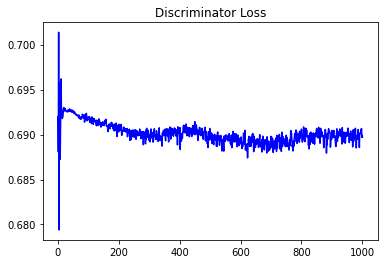

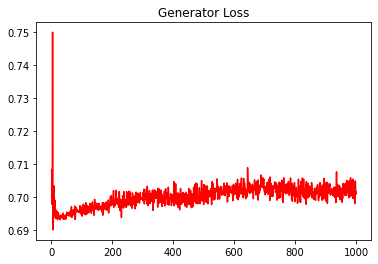

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07809622898408333


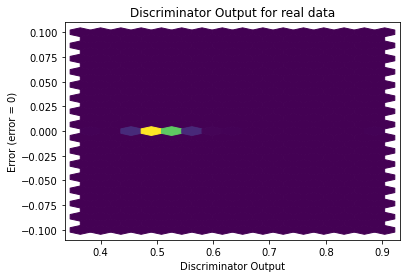

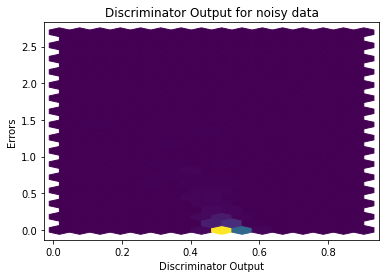

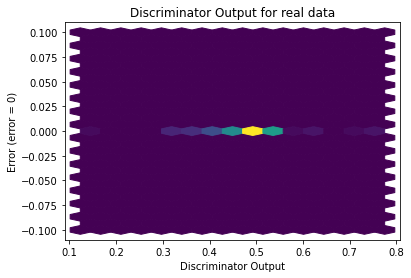

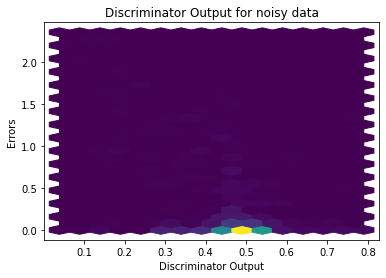

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


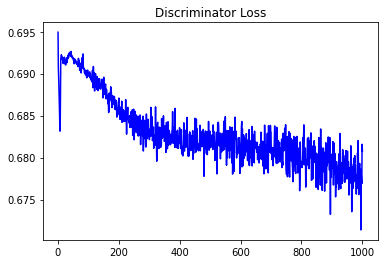

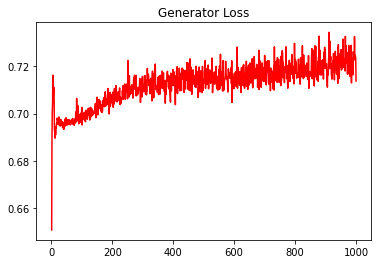

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10302286309023713


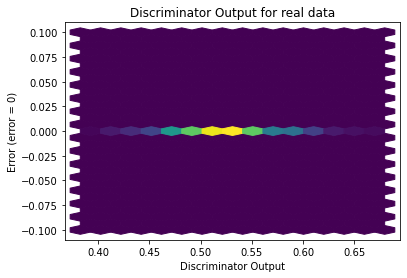

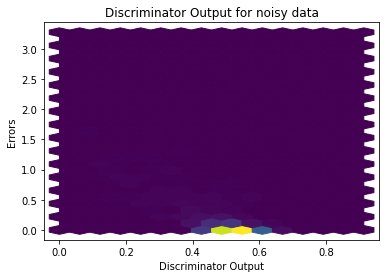

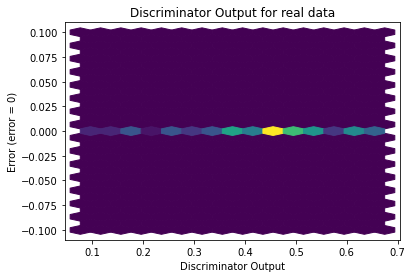

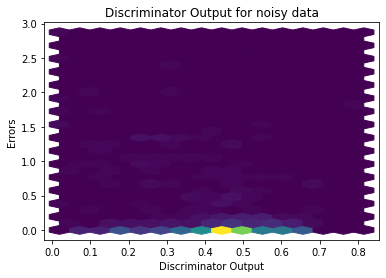

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4273]], requires_grad=True)
